DSF4-NB-2, Statistics with Python, 2020-06-11, S. Haug, University of Bern. 

# Parameter estimation / regression

**Average expected study time :** 3x45 min (depending on your background)

**Learning outcomes :**

- Know what is meant with parameter estimation and regression
- Perform linear regression with Python by example
- Perform non-linear regression with Python by example
- Know what non-parametric regression is 

**Main python module used**
- the Scipy.stat module https://docs.scipy.org/doc/scipy/reference/stats.html

**Content :**

3.0 Regression - Situation<br>
3.1 Linear regression<br>

## What you should do for your uncertainties

When you have a data analysis project, you need to define the final numbers and plots you want to produce. In order to control your uncertaines, you should maintain a list/table with the largest uncertainties and their effect on the final number(s) as percentages.  

## Just a nice table

As a data scientist you should roughly know what 1, 2, 3 standard deviations ("sigmas") means in terms of probability (or area in the normal distribution).

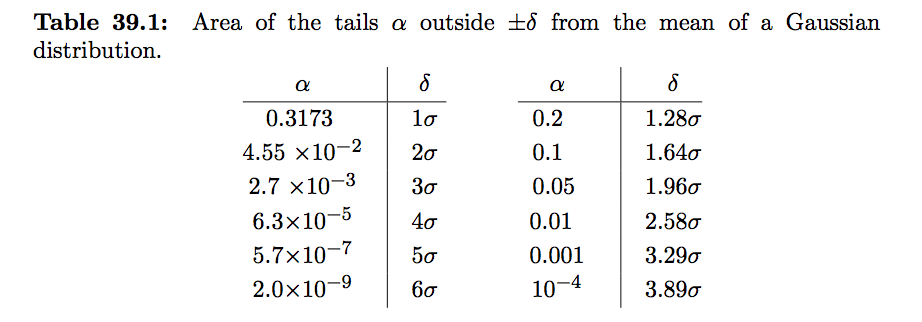

# 3.0 Regression - Situation

We have data and want to extract model paramters from that data. An example would be to estimate the mean and the standard deviation, assuming a normal distribution. Another one would be to fit a straight line. For historical reasons this kind of analysis is often called regression. Some scientists just say fitting (model parameters to the data).

We distinguish between parametric and non-parametric models. A line and the normal distribution are both parametric.

## 3.1 About linear Regression

Linear regression means fitting linear parameters to a set of data points (x,y). x and y may be vectors. You may consider this as the simplest case of Machine Learning (see Module 3). Example, a line is described by

$$y = ax + b$$

Thus two parameters a (slope) and b (intersection with y axis) can be fitted to (x,y).

There are different fitting methods, mostly least squares or maximum likelihood are used.


## Linear regression in Python

Import the Python libraries we need.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

Read the data from file and do a linear regression for a line in the plength-pwidth space of the setosa sample. We use https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html, using least squares. 

In [3]:
url = 'https://www.openml.org/data/get_csv/61/dataset_61_iris.arff'
df = pd.read_csv(url)
#df_set = df[df['species']=='Iris-versicolor']
df_set = df[df['class']=='Iris-setosa']
plengths = df_set['petallength']
pwidths  = df_set['petalwidth']
slope, intercept, r_value, p_value, std_err = stats.linregress(plengths,pwidths)
print (slope, intercept, std_err)

0.18926247288503262 -0.03308026030368777 0.08489680724058374


The number of digits is ridiculous. Let's print it better.

In [4]:
print ('Gradient = %1.2f +- %1.2f' % (slope,std_err))

Gradient = 0.19 +- 0.08


let's look at the scatter plot to see if this makes sense.

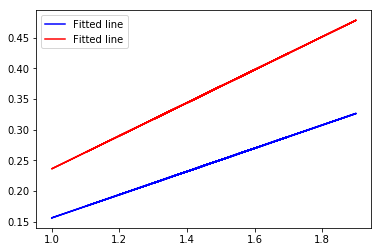

In [6]:
#ax = df_set.plot(x='petallength',y='petalwidth',kind="scatter",c='c')
plt.plot(plengths, intercept + slope*plengths, 'b', label='Fitted line')
plt.plot(plengths, intercept + (slope+0.08)*plengths, 'r', label='Fitted line')
plt.legend()
plt.show()

By eye it is hard to say how good this fit is. Try the same regression  with versicolor. The result may be a bit clearer.

We now have a model, a straight line, whose shape we have chosen, but whose parameters (slope and intersection) have been estimated/fitted from data with the least squares method. It tells us that pwidth of a leaf is plength x slope ( f(plength) = a x slope). So we can do interpolation and extrapolation, i.e. get the pwidth at any plength.




### Example Exponential p.d.f.

With scale $\beta$ and location $\mu$

$$f(x)=\frac{1}{\beta} e^{-(x-\mu)/\beta}     ,  x \ge \mu;\beta>0$$

 Location = 0.01 , Scale = 1.15


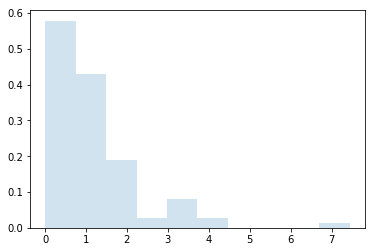

In [7]:
## Let us fit data to an exponential distribution
fig, ax = plt.subplots(1, 1)
## First generate a data set from an exponential distribution
x = stats.expon.rvs(size=100) #  scale = 0.0, location = 0.00, 1000 variates
ax.hist(x, density=True, histtype='stepfilled', alpha=0.2)
## Fit scale and location to the histogram/data
loc, scale = stats.expon.fit(x) # ML estimator scale, lambda * exp(-lambda * x), scale =1/lambda
print(' Location = %1.2f , Scale = %1.2f' % (loc,scale)) 
plt.show()

This fit method is poor in the sense that it doesn't return uncertainties on the fitted values. This we normally want to know. The curve_fit method below also returns the uncertainties.

## 3.2 Non-linear regression

If a line is not streight it is curved. There are many mathematical functions whose parameters we can try to fit to experimental data points. Some examples: Polynominals (first order is linear regression, second order is a parabola etc), exponential functions, normal function, sindoial wave function etc. You need to choose an approriate shape/function to obtain a good result. 

With the Scipy.stat module we can look for preprogrammed functions (in principle you can program your own function whose parameters you want to fit too): https://docs.scipy.org/doc/scipy/reference/stats.html. 

The scipy.optimize module provides a more general non-linear least squares fit. Look at and play with this example. It is complex and you will probably need some time testing, googling etc.

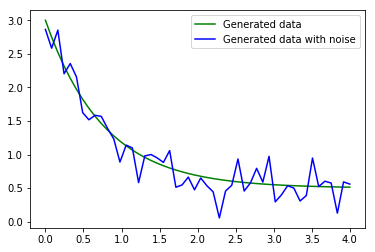

In [8]:
from scipy.optimize import curve_fit

def func(x, a, b, c):
     return a * np.exp(-b * x) + c

xdata = np.linspace(0, 4, 50) # 
y = func(xdata, 2.5, 1.3, 0.5)
plt.plot(xdata, y, 'g-', label='Generated data')
np.random.seed(1729)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='Generated data with noise')
plt.legend()
plt.show()

[2.55423706 1.35190947 0.47450618]


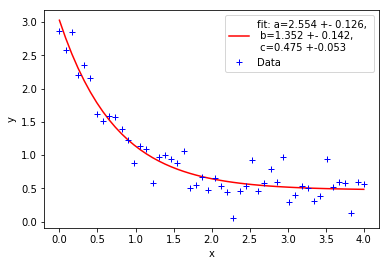

array([0.12605755, 0.14212384, 0.05315968])

In [9]:
popt, pcov = curve_fit(func, xdata, ydata)
print(popt)
perr = np.sqrt(np.diag(pcov)) # Standard deviation = square root of the variance being on the diagonal of the covariance matrix
plt.plot(xdata, func(xdata, *popt), 'r-',label= \
         'fit: a=%5.3f +- %5.3f, \n b=%5.3f +- %5.3f, \n c=%5.3f +-%5.3f' % \
         (popt[0],perr[0],popt[1],perr[1],popt[2],perr[2]))
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xdata, ydata, 'b+', label='Data')
plt.legend()
plt.show()
perr = np.sqrt(np.diag(pcov)) # Standard deviation = square root of the variance being on the diagonal of the covariance matrix
perr

# 3.3 Non-parametric regression

So far we have used functions (models) with some predefined shape/form. The parameters we fitted to data. If we have no clue about the form, we may try to fit with non-parametric methods. However, these require more data as also the shape needs to guessed or fitted from the data. So normally a non-parametric method gives poorer results. 

There are several ways to do this in Python. You make look at this if you are interested:

https://pythonhosted.org/PyQt-Fit/NonParam_tut.html